# <font color = "red">[READ THIS] Before you start</font>
Welcome to UpLevel DIY projects! In this series, you're challenged to independently work (with our guidance) with data that you will collect to UpLevel yourself. 

We hope you're excited to embark on this adventure.
### Warning:
This isn't just any coding course or programmes, where you receive helper code as you move from one code block to another. 

This is when things get <em>real</em>.

In this project, you will receive instructions to execute a task along with an intended outcome. Most importantly, we will provide you with directions you can go to, to pick up code independently and implement it in this notebook.

Don't worry though, we'll be dropping lots of resources you can consult and these readings will contain everything you need to succeed. You can also perform independent research to find answers independently. You just have to read closely and pick out the parts that make most sense. 

<strong>We make you do this not because we're lazy bastards but because being able to indepedently find code is a highly underrated skill and that's something all companies look out for.</strong>

If you're really stuck and are on the verge of giving up, we gotchu fam. Head on over to https://bit.ly/UpLevelSG and post your questions there. 

### What we'll be doing:
In this project, we will do the following:

<ol>
    <li>Retrieve sensor readings from a room</li>
    <li>Combine the datasets together</li>
    <li>Perform exploratory data analysis on the combined dataset</li>
    <li>Derive new features from timestamp</li>
    <li>Train a machine learning regression model to predict room occupancy using sensor data</li>
</ol>

### Expectations:
We're not going to sugarcoat it - it'll be challenging at times. You have to promise to put in the time and effort to UpLevel yourself. 

But we promise you that it'll ultimately be fun and rewarding, and you'll come out of it stronger and more confident than before.

<div style="background-color: #78E8A3; padding: 20px">
<h3>Project Scenario</h3>
<p>You are a researcher doing research in the field of smart Internet-of-Things (IoT) device.</p>
<p>The latest project you're working on using ambient data, e.g., temperature, light levels, etc, to predict whether a room is occupied or not.</p>
<p>Why is it important? Imagine being able to let the devices turn themselves off when they predict that there's no one in the room, without explicit instructions.</p>
<p>That would be such a sustainable device!</p>
<p>In this project, you will use historical data collected by sensors to train a machine learning model to predict whether room occupancy.</p>
</div>

### Step 1: Download room occupancy data
Firstly, we'll need data. 

Head on to the UCI Machine Learning Repository for our dataset <a href="https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+">here</a>.

Over there, click on "Data Folder" and download your <a href = "https://archive.ics.uci.edu/ml/machine-learning-databases/00357/occupancy_data.zip">data</a>. You should download a zip file named "occupancy_data.zip".

In the off chance that the data is no longer available, click <a href = "https://uplevelsg.s3.ap-southeast-1.amazonaws.com/ProjectRoomOccupancy/occupancy_data.zip">here</a> for an alternative source.

### Step 2: Unzip files from folder
Unzip the files from the folder. You should have:
- datatest.txt
- datatest2.txt
- datatraining.txt

in your working folder. 

### Step 3: Import libraries
Import the following libraries:
- pandas as pd
- matplotlib.pyplot as plt

In [ ]:
# Step 3: Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Step 4: Read datatest.txt into a DataFrame
Using .read_csv (yes you read that right), open up "datatest.txt" into a DataFrame.

![datatestDataFrame](https://uplevelsg.s3.ap-southeast-1.amazonaws.com/ProjectRoomOccupancy/datatestDataFrame.png)

You'll see something like this, a DataFrame with
- 2,665 rows
- 7 columns

In [ ]:
# Step 4: Read datatest.txt

In [4]:
df = pd.read_csv('/Users/sm/Desktop/occupancy_data/datatest.txt')

### Step 5: Get dtypes of datatest DataFrame
Take a look at what data types there are in your DataFrame with .dtypes.

What do you notice about column that is supposed to contain your date?

<details>
    <summary><strong>Click once to see what we think</strong>></summary>
    <div>We anticipate date column to be a DateTime object, but instead it is "object", and is thus most likely a string</div>
</details>

In [ ]:
# Step 5: Get dtypes of datatest

In [6]:
df.dtypes

date              object
Temperature      float64
Humidity         float64
Light            float64
CO2              float64
HumidityRatio    float64
Occupancy          int64
dtype: object

### Step 6: Convert 'date' column to a DateTime object
We'll want to understand the temporal nature of this dataset, so let's make sure that we're dealing with DateTime objects in the 'date' column.

Use .to_datetime and convert the 'date' column from a column containing strings to DateTime objects.

<details>
    <summary><strong>Click once for a hint</strong></summary>
    <div>Google "convert the column type from string to datetime format in Pandas dataframe"</div>
</details>

In [ ]:
# Step 6: Convert 'date' column to column with DateTime objects

In [7]:
df['date']=pd.to_datetime(df['date'])

### [Optional] Check dtypes again
This time, when you check the dtypes of your DataFrame, you will notice something different.

In [ ]:
# Optional: Check dtypes of datatest DataFrame again

In [8]:
df.dtypes

date             datetime64[ns]
Temperature             float64
Humidity                float64
Light                   float64
CO2                     float64
HumidityRatio           float64
Occupancy                 int64
dtype: object

### Step 7: Repeat Steps 4-6 with datatest2
Similarly, let's read "datatest2.txt" and convert the dates in the "date" column to DateTime objects as well.

![datatest2](https://uplevelsg.s3.ap-southeast-1.amazonaws.com/ProjectRoomOccupancy/datatest2DataFrame.png)

You should get a DataFrame that has:
- 9,752 rows
- 7 columns

In [9]:
# Step 7a: Read 'datatest2.txt'
df1 = pd.read_csv('/Users/sm/Desktop/occupancy_data/datatest2.txt')

In [10]:
df1.dtypes

date              object
Temperature      float64
Humidity         float64
Light            float64
CO2              float64
HumidityRatio    float64
Occupancy          int64
dtype: object

In [11]:
# Step 7b: Convert date column
df1['date']=pd.to_datetime(df1['date'])

In [12]:
# Step 7c: Check dtypes of datatest2
df1.dtypes

date             datetime64[ns]
Temperature             float64
Humidity                float64
Light                   float64
CO2                     float64
HumidityRatio           float64
Occupancy                 int64
dtype: object

### Step 8: Repeat Steps 4-6 with datatraining.txt
You know the drill by now. 

![datatraining](https://uplevelsg.s3.ap-southeast-1.amazonaws.com/ProjectRoomOccupancy/datatrainingDataFrame.png)

The DataFrame containing your datatraining.txt file will have:
- 8,143 rows
- 7 columns

In [13]:
# Step 8a: Read datatraining.txt into a DataFrame
df2 = pd.read_csv('/Users/sm/Desktop/occupancy_data/datatraining.txt')

In [14]:
# Step 8b: Convert 'date' column 
df2['date']=pd.to_datetime(df2['date'])

In [15]:
# Step 8c: Check dtypes of datatraining
df2.dtypes

date             datetime64[ns]
Temperature             float64
Humidity                float64
Light                   float64
CO2                     float64
HumidityRatio           float64
Occupancy                 int64
dtype: object

### Step 9: Plot temperature
Now that we have our files read, let's plot 'Temperature' from the three DataFrames in the same figure.

Plot 'Temperature' vs 'date' from the three DataFrames in the same plot. 

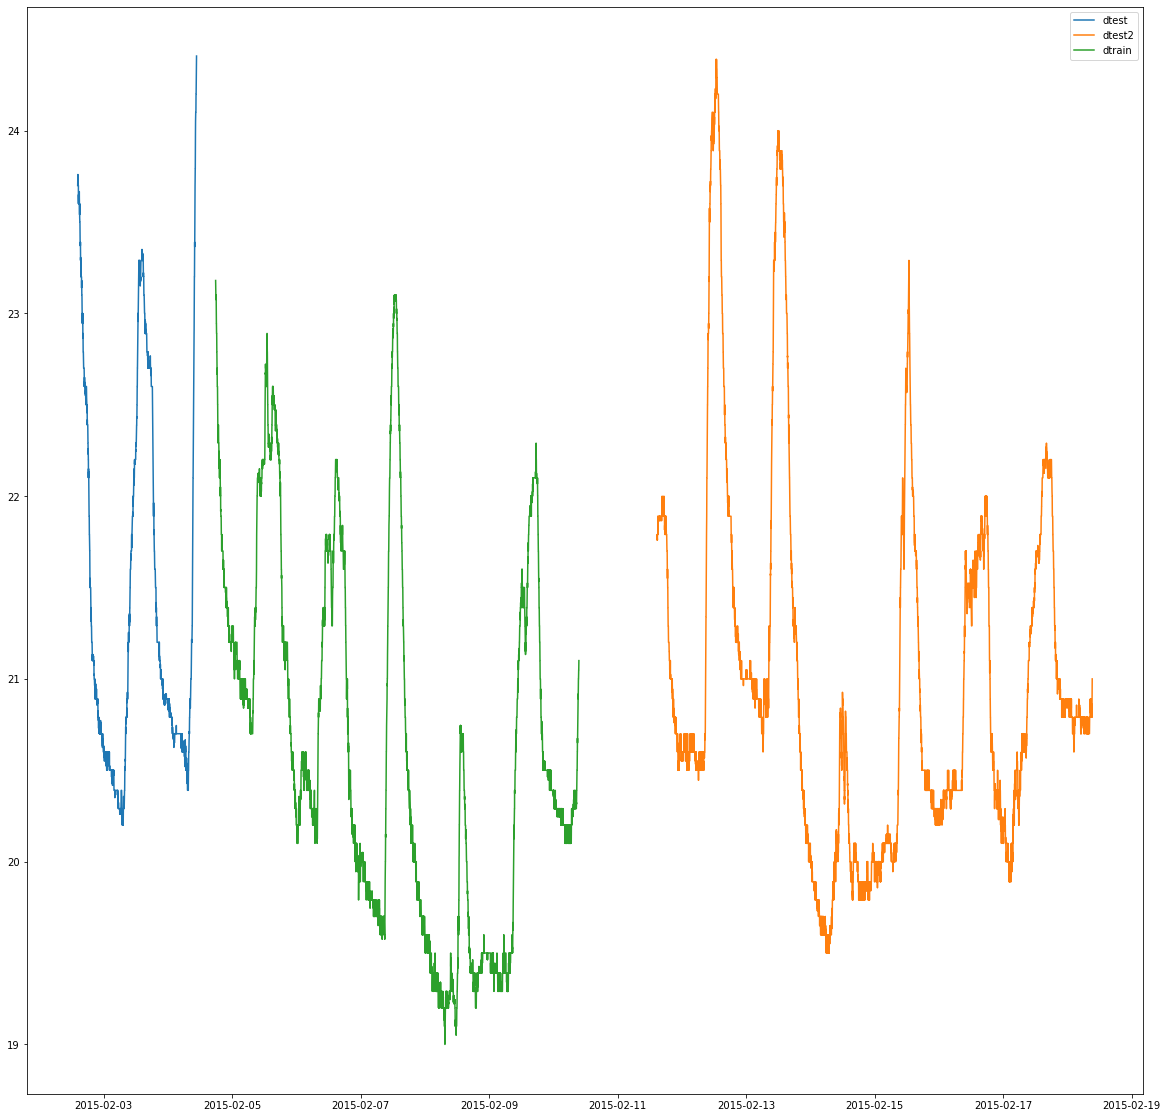

In [25]:
# Step 9: Plot the three 'Temperature' columns together in the same plot
fig, axs = plt.subplots(figsize=(20,20), sharey=True)
axs.plot(df['date'], df['Temperature'])
axs.plot(df1['date'], df1['Temperature'])
axs.plot(df2['date'], df2['Temperature'])
axs.legend(['dtest','dtest2','dtrain'])

<details>
    <summary><strong>Click once for a hint</strong></summary>
    <div>Google "plot graph of the same variable from two different dataframes in Python"</div>
</details>

<details>
    <summary><strong>Click once to see what we got</strong></summary>
    <img src = 'https://uplevelsg.s3.ap-southeast-1.amazonaws.com/ProjectRoomOccupancy/TemperaturePlot.png'>
    <br>
    <div>Looks like there's missing data in between the DataFrames, with the largest gap between datatraining and datatest2</div>
</details>

### Step 10: Concatenate the three DataFrames
Combine the three DataFrames into a large DataFrame.

You'll have a DataFrame with:
- 20,560 rows
- 7 columns

In [32]:
# Step 10: Concat the three DataFrames
T = df.append(df1).append(df2)

### Step 11: Sort the DataFrame by 'date'
Just to be safe, sort the DataFrame by 'date' if you haven't done so.

In [35]:
# Step 11: Sort the DataFrame by 'date'
T = T.sort_values(by = 'date')

### Step 12: Export the DataFrame as CSV
Time to export the DataFrame into a CSV file for use in Part II. 

Don't forget that we don't need the index to come along so don't forget to put <font color = 'green'><strong>None</strong></font> for your index argument.

In [38]:
# Step 12: Export the DataFrame as CSV
T.to_csv('Proj_Room_Occupancy.csv',index=None)

### End of Part I
Well done! We're done with Part I. 

In this Part, we:
- collected sensor data
- unzipped and read the files
- explored the data briefly
- combined them into a larger file.

In Part II, we will visualize the data further and perform some exploratory data analysis. See you there!
